In [2]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
#세가지 데이터 셋 모두 읽어오기

def read_dataset():
    train = pd.read_csv("train.csv")
    print("train data import 성공")
    train_labels = pd.read_csv("train_labels.csv")
    print("train labels data import 성공")
    test = pd.read_csv("test.csv")
    print("test dat import 성공")
    return train, train_labels, test

In [4]:
train_df, train_labels_df, test_df = read_dataset()

train data import 성공
train labels data import 성공
test dat import 성공


## Data 탐색

In [5]:
train_df.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [6]:
train_labels_df.head()

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1


In [7]:
test_df.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,20090109393214576,0,0,cutscene_click,basic,0,NaN,-413.991405,75.685314,380.0,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0
1,20090109393214576,1,1965,person_click,basic,0,NaN,-105.991405,-63.314686,688.0,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
2,20090109393214576,2,3614,person_click,basic,0,NaN,-418.991405,47.685314,375.0,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
3,20090109393214576,3,5330,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
4,20090109393214576,4,6397,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0


In [9]:
train_df.shape

(26296946, 20)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      int64  
 1   index           int64  
 2   elapsed_time    int64  
 3   event_name      object 
 4   name            object 
 5   level           int64  
 6   page            float64
 7   room_coor_x     float64
 8   room_coor_y     float64
 9   screen_coor_x   float64
 10  screen_coor_y   float64
 11  hover_duration  float64
 12  text            object 
 13  fqid            object 
 14  room_fqid       object 
 15  text_fqid       object 
 16  fullscreen      int64  
 17  hq              int64  
 18  music           int64  
 19  level_group     object 
dtypes: float64(6), int64(7), object(7)
memory usage: 3.9+ GB


In [11]:
test_df.shape

(3728, 21)

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3728 entries, 0 to 3727
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_id      3728 non-null   int64  
 1   index           3728 non-null   int64  
 2   elapsed_time    3728 non-null   int64  
 3   event_name      3728 non-null   object 
 4   name            3728 non-null   object 
 5   level           3728 non-null   int64  
 6   page            153 non-null    float64
 7   room_coor_x     3366 non-null   float64
 8   room_coor_y     3366 non-null   float64
 9   screen_coor_x   3366 non-null   float64
 10  screen_coor_y   3366 non-null   float64
 11  hover_duration  353 non-null    float64
 12  text            1162 non-null   object 
 13  fqid            2505 non-null   object 
 14  room_fqid       3728 non-null   object 
 15  text_fqid       1162 non-null   object 
 16  fullscreen      3728 non-null   int64  
 17  hq              3728 non-null   i

In [14]:
train_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424116 entries, 0 to 424115
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   session_id  424116 non-null  object
 1   correct     424116 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.5+ MB


In [16]:
train_df.isna().sum()
#총 26296946개 중

session_id               0
index                    0
elapsed_time             0
event_name               0
name                     0
level                    0
page              25732402
room_coor_x        2073272
room_coor_y        2073272
screen_coor_x      2073272
screen_coor_y      2073272
hover_duration    24294702
text              16679807
fqid               8274415
room_fqid                0
text_fqid         16679702
fullscreen               0
hq                       0
music                    0
level_group              0
dtype: int64

In [17]:
test_df.isna().sum()
#총 3728개 중 

session_id           0
index                0
elapsed_time         0
event_name           0
name                 0
level                0
page              3575
room_coor_x        362
room_coor_y        362
screen_coor_x      362
screen_coor_y      362
hover_duration    3375
text              2566
fqid              1223
room_fqid            0
text_fqid         2566
fullscreen           0
hq                   0
music                0
level_group          0
session_level        0
dtype: int64

## EDA

### Missing Values

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

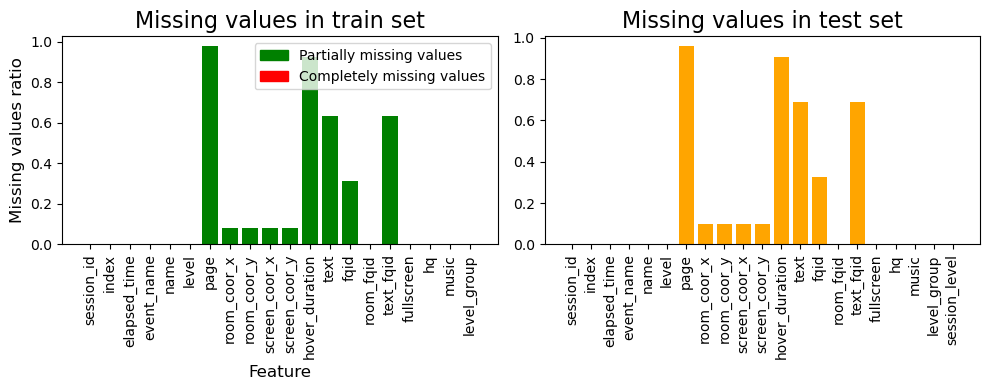

In [23]:
train_missing_ratios = train_df.isna().sum() / len(train_df)
test_missing_ratios = test_df.isna().sum() / len(test_df)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(train_missing_ratios.index,
       train_missing_ratios.values,
       color=['red' if ratio == 1 else 'green' for ratio in train_missing_ratios.values])
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Missing values ratio', fontsize=12)
plt.title('Missing values in train set', fontsize=16)
plt.xticks(rotation=90)
plt.legend(handles = [mpatches.Patch(color='green'),
                     mpatches.Patch(color='red')],
          labels=['Partially missing values', 'Completely missing values'])


plt.subplot(1,2,2)
plt.bar(test_missing_ratios.index,
       test_missing_ratios.values,
       color=['red' if ratio == 1 else 'orange' for ratio in test_missing_ratios.values])
plt.title('Missing values in test set', fontsize=16)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [24]:
#train set에서는 page, hover_duration 데이터가 거의 완전히 없는 값
#test set에서도 page, hover_duration 데이터가 거의 완전히 없는 값에 해당한다

### Level Group Distribution

In [46]:
train_df['level_group'].unique()

array(['0-4', '5-12', '13-22'], dtype=object)

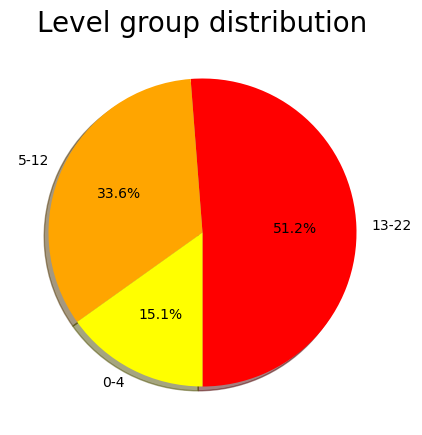

In [52]:
#원형 그래프 비율 확인

from pylab import rcParams

labels = train_df['level_group'].value_counts(sort=True).index
sizes = train_df['level_group'].value_counts(sort=True)

colors = ['red', 'orange', 'yellow']
explode = (0.1,0)

rcParams['figure.figsize'] = 5,5
plt.pie(sizes, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=270)
plt.title('Level group distribution', size=20)
plt.show()

### Page Distribution

In [53]:
train_df['page'].unique()

array([nan,  0.,  1.,  3.,  4.,  5.,  6.,  2.])

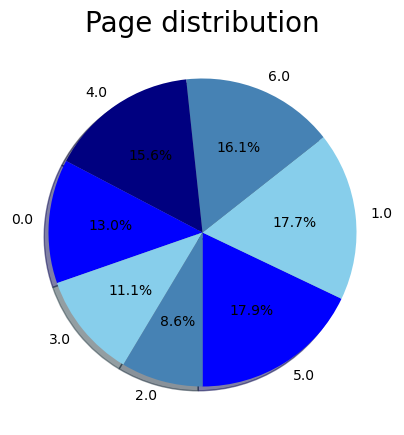

In [62]:
#원형 그래프 비율 확인

labels = train_df['page'].value_counts(sort=True).index
sizes = train_df['page'].value_counts(sort=True)

colors = ['blue', 'skyblue', 'steelblue', 'navy']
explode = (0.1,0)

rcParams['figure.figsize'] = 5,5
plt.pie(sizes, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=270)
plt.title('Page distribution', size=20)
plt.show()

### Features Engineer

In [26]:
targets = pd.read_csv('train_labels.csv')
targets['session'] = targets.session_id.apply(lambda x : int(x.split('_')[0]))
targets['q'] = targets.session_id.apply(lambda x : int(x.split('_')[-1][1:]))
targets.head()

,session_id,correct,session,q
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1


In [27]:
cats = ['event_name','name','fqid', 'room_fqid', 'text_fqid']
nums = ['elapsed_time','level','page','room_coor_x', 'room_coor_y', 
        'screen_coor_x', 'screen_coor_y', 'hover_duration']

In [28]:
def feature_engineer(train):
    dfs = []
    #카테고리형변수
    for c in cats:
        tmp = train.groupby(['session_id', 'level_group'])[c].agg('nunique')
        #여러개의 집계함수 사용하고 싶을 때, agg() 메소드 활용
        tmp.name = tmp.name + '_nunique'
        dfs.append(tmp)
    #숫자형변수
    for c in nums:
        tmp = train.groupby(['session_id', 'level_group'])[c].agg('mean')
        dfs.append(tmp)
    for c in nums:
        tmp = train.groupby(['session_id', 'level_group'])[c].agg('std')
        #std - 표준편차
        tmp.name = tmp.name + '_std'
        dfs.append(tmp)
    df = pd.concat(dfs, axis=1)
    df = df.fillna(-1)
    df = df.reset_index()
    df = df.set_index('session_id')
    return df

In [35]:
%%time
df = feature_engineer(train_df)
df.head()

CPU times: user 45.3 s, sys: 18.8 s, total: 1min 4s
Wall time: 1min 18s


,level_group,event_name_nunique,name_nunique,fqid_nunique,room_fqid_nunique,text_fqid_nunique,elapsed_time,level,page,room_coor_x,...,screen_coor_y,hover_duration,elapsed_time_std,level_std,page_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_y_std,hover_duration_std
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,10,3,30,7,17,8.579356e+04,1.945455,-1.0,7.701275,...,383.044872,2389.500000,49246.539458,1.230975,-1.000000,399.296040,129.292411,214.871000,104.082743,3227.370757
20090312431273200,13-22,10,3,49,12,35,1.040601e+06,17.402381,-1.0,-130.347170,...,379.301020,899.925926,126666.129584,2.358652,-1.000000,622.061375,230.370874,240.280218,99.067861,1305.088265
20090312431273200,5-12,10,3,39,11,24,3.572052e+05,8.054054,-1.0,14.306062,...,378.784906,969.333333,80175.676658,2.096919,-1.000000,357.227700,137.409476,203.268560,120.255453,1316.408315
20090312433251036,0-4,11,4,22,6,11,9.763342e+04,1.870504,0.0,-84.045960,...,370.723077,1378.750000,67372.714092,1.232616,0.000000,445.980040,156.186242,252.554707,121.062929,2114.876406
20090312433251036,13-22,11,6,73,16,43,2.498852e+06,17.762529,5.1,-30.762282,...,387.930077,720.384921,777382.529186,1.825923,0.863075,529.575656,234.279590,259.288856,133.345693,1990.705518


### Train Random Forest Model

In [36]:
features = [c for c in df.columns if c != 'level_group']
print(len(features), 'features')
all_users = df.index.unique()
print(len(all_users), 'users info')

21 features
23562 users info


In [40]:
from sklearn.model_selection import KFold, GroupKFold
from sklearn.ensemble import RandomForestClassifier

gkf = GroupKFold(n_splits=5)
oof = pd.DataFrame(data=np.zeros((len(all_users),18)), index=all_users)
#oof - out of fold
#np.zeros -> 0으로 채워진 배열 생성
models = {}

# 5가지 그룹의 K FOLD를 활용하여 cv score (k겹 교차검증) 계산하기
#교차 검증의 점수를 높이기 위해서는 데이터 셋에 있는 모든 샘플에 대해 모델이 잘 일반화 되어야 함
for i, (train_index, test_index) in enumerate(gkf.split(X=df, groups=df.index)):
    print('#'*25)
    print('### Fold',i+1)
    print('#'*25)
    
    # 질문 1~18번까지 실행
    for t in range(1,19):
        print(t,', ',end='')
        
        # 몇 개의 질문으로 train할지에 따라 group 나누기
        if t<=3: grp = '0-4'
        elif t<=13: grp = '5-12'
        elif t<=22: grp = '13-22'
            
        # TRAIN DATA
        train_x = df.iloc[train_index]
        #.iloc[] - 행 인덱스 번호로 행 선택
        #.loc[] - label이나 조건 표현으로 선택
        train_x = train_x.loc[train_x.level_group == grp]
        train_users = train_x.index.values
        train_y = targets.loc[targets.q==t].set_index('session').loc[train_users]
        
        # VALID DATA
        valid_x = df.iloc[test_index]
        valid_x = valid_x.loc[valid_x.level_group == grp]
        valid_users = valid_x.index.values
        valid_y = targets.loc[targets.q==t].set_index('session').loc[valid_users]
        
        # TRAIN MODEL
        clf = RandomForestClassifier() 
        clf.fit(train_x[features].astype('float32'), train_y['correct'])
        
        # SAVE MODEL, PREDICT VALID OOF
        models[f'{grp}_{t}'] = clf
        oof.loc[valid_users, t-1] = clf.predict_proba(valid_x[features].astype('float32'))[:,1]
        
    print()

#########################
### Fold 1
#########################
1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 
#########################
### Fold 2
#########################
1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 
#########################
### Fold 3
#########################
1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 
#########################
### Fold 4
#########################
1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 
#########################
### Fold 5
#########################
1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 


### Compute CV Score

예측 확률을 1과 0으로 변환해야 합니다. 경쟁 측정 기준은 정밀도와 리콜의 조화 평균인 F1 점수입니다. 1을 예측할 때와 0을 예측할 때의 p > 임계값에 대한 최적 임계값을 찾아 F1 점수를 최대화하기 위한 작업을 진행

=> 정밀도와 리콜이 균형있게 좋은 모델을 찾기 위해 f1 점수를 활용한다

In [41]:
# 18개의 열 dataframe에 true 라벨을 붙여주기
true = oof.copy() #list 복사하기
for k in range(18):
    # GET TRUE LABELS
    tmp = targets.loc[targets.q == k+1].set_index('session').loc[all_users]
    true[k] = tmp.correct.values

In [43]:
from sklearn.metrics import f1_score

# 최적의 한계점 찾기
scores = []; thresholds = []
best_score = 0; best_threshold = 0

for threshold in np.arange(0.4,0.81,0.01):
    print(f'{threshold:.02f}, ',end='')
    preds = (oof.values.reshape((-1))>threshold).astype('int')
    m = f1_score(true.values.reshape((-1)), preds, average='macro')   
    scores.append(m)
    thresholds.append(threshold)
    if m>best_score:
        best_score = m
        best_threshold = threshold

0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.70, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.80, 

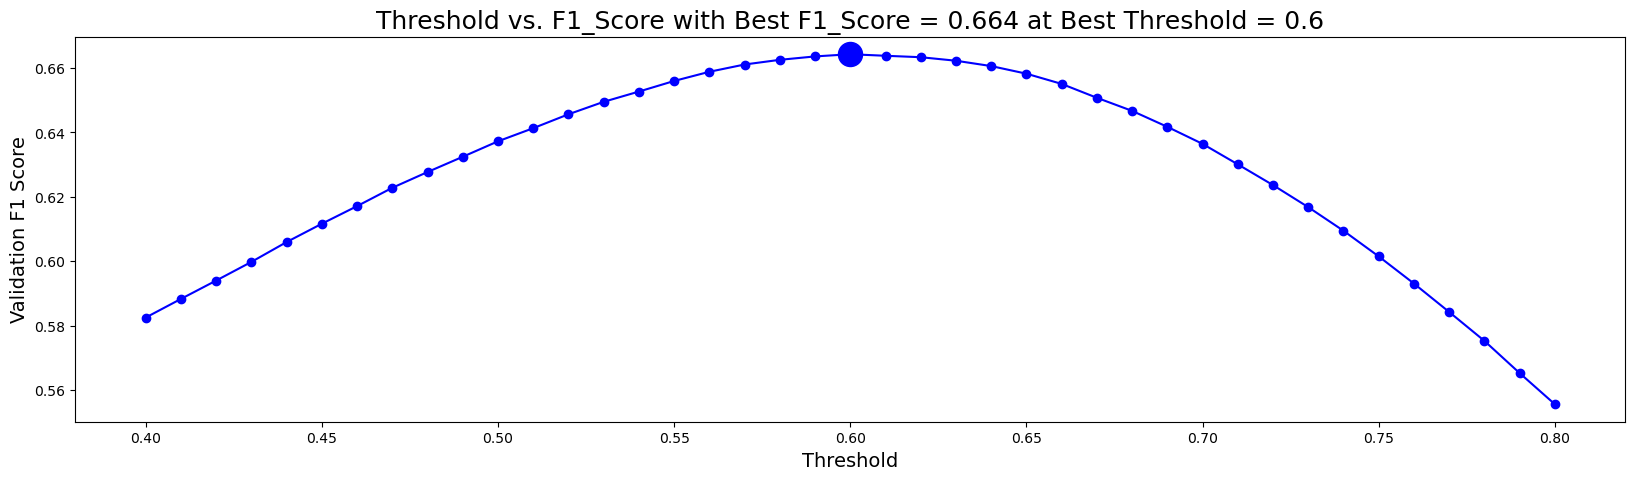

In [44]:
import matplotlib.pyplot as plt

# PLOT 한계점 VS. F1_SCORE
plt.figure(figsize=(20,5))
plt.plot(thresholds,scores,'-o',color='blue')
plt.scatter([best_threshold], [best_score], color='blue', s=300, alpha=1)
plt.xlabel('Threshold',size=14)
plt.ylabel('Validation F1 Score',size=14)
plt.title(f'Threshold vs. F1_Score with Best F1_Score = {best_score:.3f} at Best Threshold = {best_threshold:.3}',size=18)
plt.show()

#roc, auc 

In [45]:
print('When using optimal threshold...') #어떤 한계점이 가장 최적일까

for k in range(18):
        
    # 질문별 f1 score 계산
    m = f1_score(true[k].values, (oof[k].values>best_threshold).astype('int'), average='macro')
    print(f'Q{k}: F1 =',m)
    
# 전체 f1 score 계산
m = f1_score(true.values.reshape((-1)), (oof.values.reshape((-1))>best_threshold).astype('int'), average='macro')
print('==> Overall F1 =',m)

When using optimal threshold...
Q0: F1 = 0.5625618980247049
Q1: F1 = 0.49464879356568364
Q2: F1 = 0.48455595623205905
Q3: F1 = 0.5816198670101699
Q4: F1 = 0.559713752610766
Q5: F1 = 0.5884098850358732
Q6: F1 = 0.5667109046313459
Q7: F1 = 0.5331664415257842
Q8: F1 = 0.5836555489964581
Q9: F1 = 0.5221703094668048
Q10: F1 = 0.5604034683324192
Q11: F1 = 0.4860405851241421
Q12: F1 = 0.44007260482278493
Q13: F1 = 0.5837336301718714
Q14: F1 = 0.5050200976085639
Q15: F1 = 0.4830611494451775
Q16: F1 = 0.5282240277101535
Q17: F1 = 0.4872698785742264
==> Overall F1 = 0.6642644653175862


In [ ]:
#Q5(6번 질문)에서 가장 높은 f1 score 형성